# Import library

In [23]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import os
import csv
import glob
from skimage import io,color,exposure,transform
import pickle
from skimage.feature import hog
from random import randint

# Step 1: Load data traffic signs 

In [2]:
training_file = './train.p'
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
X_train, y_train = train['features'], train['labels']

In [9]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

### 1.1. Number of sample

In [3]:
n_train = len(y_train)
imageShape = X_train.shape
n_classes = len(np.unique(y_train))
print("Number of sample: ", n_train )
print("\nImage data Shape: ", imageShape)
print("\nNumber of class: ", n_classes)

Number of sample:  34799

Image data Shape:  (34799, 32, 32, 3)

Number of class:  43


### 1.2 Show first Image of each class

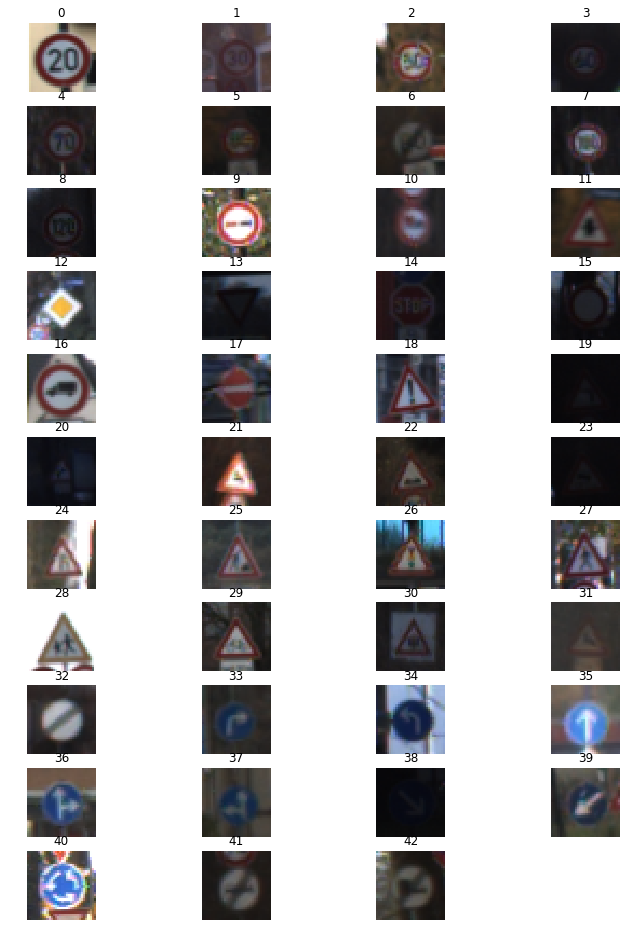

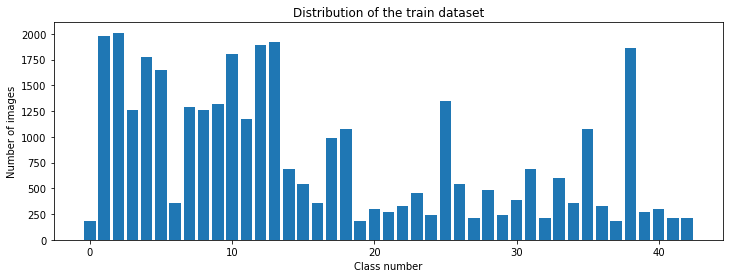

Min number of images per class = 180
Max number of images per class = 2010


In [4]:
%matplotlib inline

plt.figure(figsize=(12, 16.5))
num_of_samples=[]
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :]) #draw the first image of each class
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

print("Min number of images per class =", min(num_of_samples))
print("Max number of images per class =", max(num_of_samples))

# 2. Extract feature using HOG

### 2.1 Convert Image RGB to grayscale

In [19]:
dataset = []
listdata = []
for i in range(0, len(y_train)):
    dataset.append(color.rgb2gray(X_train[i, :, :, :]))
    listdata.append(np.asarray(dataset[i]).reshape(-1))
dataset=dataset*256

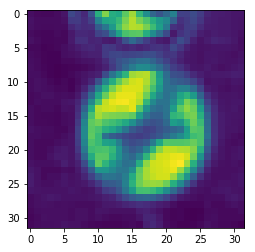

In [6]:
plt.imshow(dataset[0])

### 2.2 Reduction dementions using HoG

In [34]:
hogs=[]
for i in range(0,len(y_train)):
    hogs.append(hog(dataset[i], orientations=3, pixels_per_cell=(16,16),cells_per_block=(1, 1)))


C:\Users\Lenovo\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


## Show on matrix:

In [24]:
pca = decomposition.PCA(n_components=2)
train_reduced = pca.fit_transform(listdata)
colors = []
for i in range(max(y_train)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))


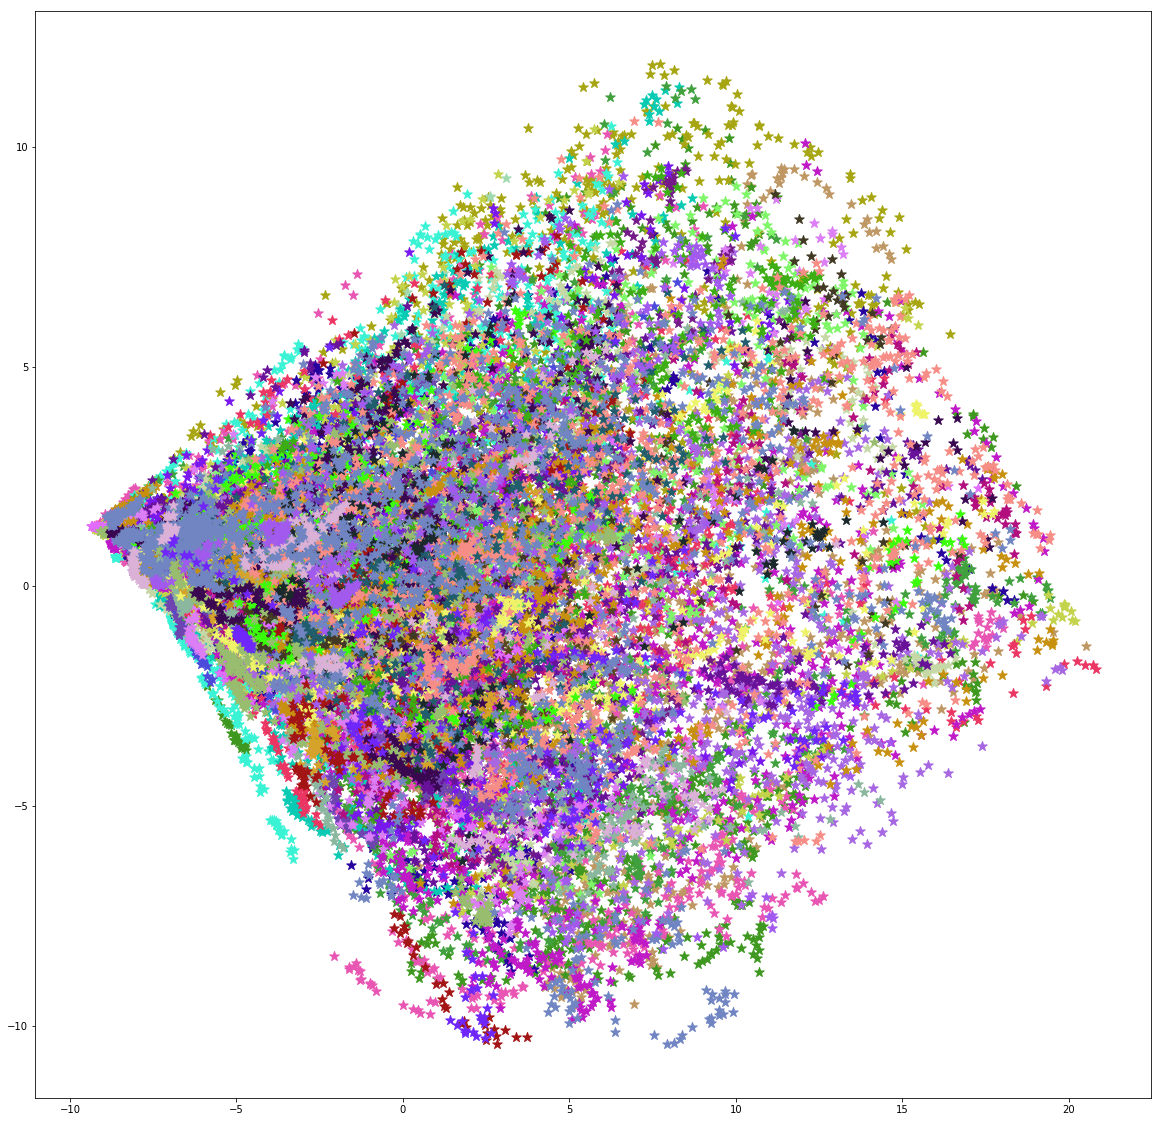

In [26]:
plt.show()
plt.figure(figsize=(20, 20))
for i in range(0,max(y_train)): 
    plt.scatter(train_reduced[y_train==i,0], train_reduced[y_train ==i,1], s=100, c=colors[i], marker='*', label='cluster 1')

In [27]:
km = KMeans(n_clusters=max(y_train),init='random',n_init=100,max_iter=200,tol=1e-04,random_state=0)
sc = SpectralClustering(n_clusters=max(y_train), eigen_solver='arpack', affinity="nearest_neighbors")
ac = AgglomerativeClustering(n_clusters=max(y_train), affinity='euclidean')
db = DBSCAN(eps=17.5, min_samples=1)

In [28]:
y_km=km.fit_predict(hogs)
y_sc=sc.fit_predict(hogs)
y_ac = ac.fit_predict(hogs)
y_db = db.fit_predict(hogs)

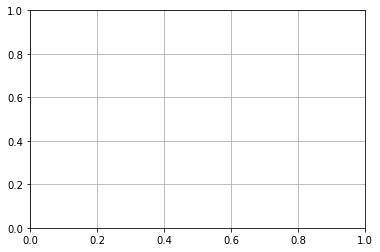

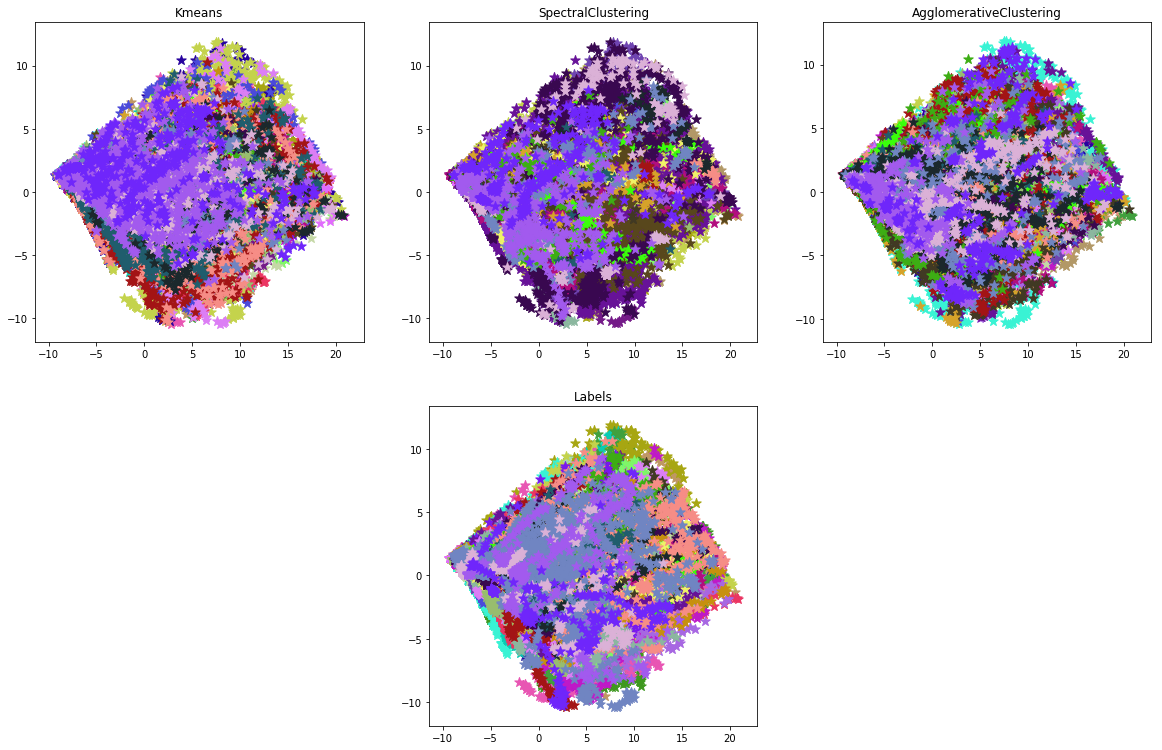

In [47]:
plt.grid()
plt.show()
plt.figure(figsize=(20,20))

for i in range(0,max(y_train)): 
    plt.subplot(331)
    plt.title('Kmeans')
    plt.scatter(train_reduced[y_km==i,0], train_reduced[y_km ==i,1], s=100, c=colors[i], marker='*')
    plt.subplot(332)
    plt.title('SpectralClustering')
    plt.scatter(train_reduced[y_sc==i,0], train_reduced[y_sc ==i,1], s=100, c=colors[i], marker='*')
    plt.subplot(333)
    plt.title('AgglomerativeClustering')
    plt.scatter(train_reduced[y_ac==i,0], train_reduced[y_ac ==i,1], s=100, c=colors[i], marker='*')

    plt.subplot(335)
    plt.title('Labels')
    plt.scatter(train_reduced[y_train==i,0], train_reduced[y_train ==i,1], s=100, c=colors[i], marker='*')
for i in range(0,max(y_db)): 
    plt.subplot(334)
    plt.title('DBSCAN')
    plt.scatter(train_reduced[y_db==i,0], train_reduced[y_db ==i,1], s=100, c=colors[i], marker='*')    
    

In [48]:
y_db

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
from sklearn import metrics
print(metrics.adjusted_rand_score(y_km,y_train))
print(metrics.adjusted_rand_score(y_sc,y_train))
print(metrics.adjusted_rand_score(y_ac,y_train))
print(metrics.adjusted_rand_score(y_db,y_train))

0.104785471657
0.072487435982
0.102930250129
0.0
